In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError as MSE

import os
import pandas as pd
from PIL import Image, ImageEnhance
import random
import csv

import os
import pandas as pd
from PIL import Image, ImageEnhance
import random
import csv
import matplotlib.pyplot as plt


def load_and_preprocess_images(image_path, target_size=(256, 256)):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0  # Normalisation des valeurs de pixels
    return image

def apply_transformations(image_path, transformations):
    val = 1
    image = Image.open(image_path)
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(val/transformations[0])
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(val/transformations[1])
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(val/transformations[2])
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(val/transformations[3])
    return image

In [43]:
def adjust_image(image_path):
    image = Image.open(image_path)
    image = image.resize((256, 256))
    preprocessed_image = load_and_preprocess_images(image_path)
    prediction = model.predict(np.array([preprocessed_image]))
    print(prediction)
    #show the original image and the transformed image
    enhanced_image = apply_transformations(image_path, prediction[0])
    original_image = Image.open(image_path)
    return original_image, enhanced_image
def plot_images(original_image, enhanced_image):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(original_image)
    ax[0].set_title('original Image')
    ax[1].imshow(enhanced_image)
    ax[1].set_title('enhanced Image')
    plt.show()
def save_image(enhanced_image, image_path):
    save_path = image_path.replace('.', '_enhanced.')
    enhanced_image.save(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[0.7984535 1.2328299 1.5431734 1.1034571 1.1508535]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[1.3442125 0.9785103 0.9916603 1.3892488]]


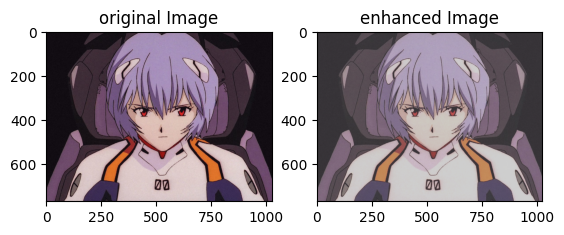

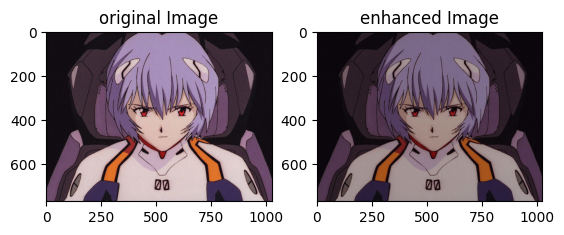

In [47]:
model = load_model('model_v2.h5', custom_objects={'mse': MSE, 'MeanSquaredError': MeanSquaredError})
image_name = 'test/test.jpg'
o_image, enhanced_image = adjust_image(image_name)
model = load_model('model_anime_.h5', custom_objects={'mse': MSE, 'MeanSquaredError': MeanSquaredError})
o_image_2, enhanced_image_2 = adjust_image(image_name)

plot_images(o_image, enhanced_image)
plot_images(o_image_2, enhanced_image_2)
save_image(enhanced_image, image_name)
save_image(enhanced_image_2, image_name.replace('.', '_2.'))

In [49]:
# model = load_model('model_8_epoch.h5', custom_objects={'mse': MSE, 'MeanSquaredError': MeanSquaredError})
# image_name = 'test/old_anime.jpeg'
# o_image, enhanced_image = adjust_image(image_name)
# model = load_model('model_anime_.h5', custom_objects={'mse': MSE, 'MeanSquaredError': MeanSquaredError})
# o_image_2, enhanced_image_2 = adjust_image(image_name)

# plot_images(o_image, enhanced_image, image_name)
# plot_images(o_image_2, enhanced_image_2, image_name + '2')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[1.1840854 0.7602346 0.7545058 1.1333936]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[1.3316863  1.0395771  0.84553593 1.0950215 ]]


TypeError: plot_images() takes 2 positional arguments but 3 were given